In [1]:
%matplotlib inline

Запишем значения пикселей конкретного блока (целые числа от 0 до 255) в прямоугольную таблицу 8x8.

In [2]:
import numpy as np

In [3]:
img = np.array([[52, 55, 61,  66,  70,  61, 64, 73],
                [63, 59, 55,  90, 109,  85, 69, 72],
                [62, 59, 68, 113, 144, 104, 66, 73],
                [63, 58, 71, 122, 154, 106, 70, 69],
                [67, 61, 68, 104, 126,  88, 68, 70],
                [79, 65, 60,  70,  77,  68, 58, 75],
                [85, 71, 64,  59,  55,  61, 65, 83],
                [87, 79, 69,  68,  65,  76, 78, 94]])

Теперь будем центрировать значения этой таблицы вокруг нуля, т.е. вычтем 128 из каждого пикселя. Получим таблицу 8x8 c отрицательными и положительными значениями.

In [4]:
g = img - 128

In [5]:
g

array([[-76, -73, -67, -62, -58, -67, -64, -55],
       [-65, -69, -73, -38, -19, -43, -59, -56],
       [-66, -69, -60, -15,  16, -24, -62, -55],
       [-65, -70, -57,  -6,  26, -22, -58, -59],
       [-61, -67, -60, -24,  -2, -40, -60, -58],
       [-49, -63, -68, -58, -51, -60, -70, -53],
       [-43, -57, -64, -69, -73, -67, -63, -45],
       [-41, -49, -59, -60, -63, -52, -50, -34]])

После этого будем кодировать данный блок специальным образом. Для этого нам понадобятся вспомогательные изображения - такие, как на слайде.
Что это за изображения? Это изображения косинусных функций. Если мы нарисуем на изображении функцию косинуса и учтём, что косинус может изменяться как по горизонтали, так и по вертикали, то и получим такие изображения. Здесь косинус изменяется по горизонтали и вертикали, а промежуточные значения - это комбинация косинусов, которые изменяются по горизонтали и по вертикали.

In [6]:
from math import cos, floor, pi, sqrt

In [7]:
from matplotlib import pyplot as plt

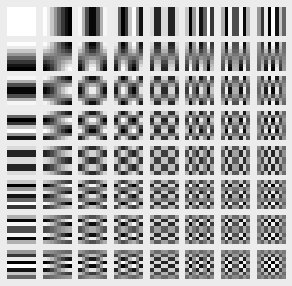

In [8]:
fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(5, 5))
dct = np.zeros((8, 8, 8, 8))
for u in range(8):
    for v in range(8):
        for x in range(8):
            for y in range(8):
                dct[u,v,x,y] = cos((2*x+1)*u*pi/16) * cos((2*y+1)*v*pi/16)
vmin, vmax = dct.min(), dct.max()
for u in range(8):
    for v in range(8):
        axes[u, v].imshow(dct[u, v], cmap='gray', vmin=vmin, vmax=vmax)
        axes[u, v].axis('off')
fig.patch.set_facecolor('#ececec')

In [9]:
vmin, vmax

(-0.9807852804032307, 1.0)

In [10]:
dct

array([[[[ 1.        ,  1.        ,  1.        , ...,  1.        ,
           1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        , ...,  1.        ,
           1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        , ...,  1.        ,
           1.        ,  1.        ],
         ...,
         [ 1.        ,  1.        ,  1.        , ...,  1.        ,
           1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        , ...,  1.        ,
           1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        , ...,  1.        ,
           1.        ,  1.        ]],

        [[ 0.98078528,  0.83146961,  0.55557023, ..., -0.55557023,
          -0.83146961, -0.98078528],
         [ 0.98078528,  0.83146961,  0.55557023, ..., -0.55557023,
          -0.83146961, -0.98078528],
         [ 0.98078528,  0.83146961,  0.55557023, ..., -0.55557023,
          -0.83146961, -0.98078528],
         ...,
         [ 0.98078528,  0.83146961

In [11]:
dct[0, 0] # изображение с равномерным цветом из верхнего левого угла таблицы изображений 

array([[1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.]])

In [12]:
dct[0, 1] # это изображение с горизонтальным косинусом, которое меняется плавно.

array([[ 0.98078528,  0.83146961,  0.55557023,  0.19509032, -0.19509032,
        -0.55557023, -0.83146961, -0.98078528],
       [ 0.98078528,  0.83146961,  0.55557023,  0.19509032, -0.19509032,
        -0.55557023, -0.83146961, -0.98078528],
       [ 0.98078528,  0.83146961,  0.55557023,  0.19509032, -0.19509032,
        -0.55557023, -0.83146961, -0.98078528],
       [ 0.98078528,  0.83146961,  0.55557023,  0.19509032, -0.19509032,
        -0.55557023, -0.83146961, -0.98078528],
       [ 0.98078528,  0.83146961,  0.55557023,  0.19509032, -0.19509032,
        -0.55557023, -0.83146961, -0.98078528],
       [ 0.98078528,  0.83146961,  0.55557023,  0.19509032, -0.19509032,
        -0.55557023, -0.83146961, -0.98078528],
       [ 0.98078528,  0.83146961,  0.55557023,  0.19509032, -0.19509032,
        -0.55557023, -0.83146961, -0.98078528],
       [ 0.98078528,  0.83146961,  0.55557023,  0.19509032, -0.19509032,
        -0.55557023, -0.83146961, -0.98078528]])

In [13]:
dct[1, 0] # Добавляем a3 c вертикальным косинусом - это изображение чуть ниже верхнего левого угла

array([[ 0.98078528,  0.98078528,  0.98078528,  0.98078528,  0.98078528,
         0.98078528,  0.98078528,  0.98078528],
       [ 0.83146961,  0.83146961,  0.83146961,  0.83146961,  0.83146961,
         0.83146961,  0.83146961,  0.83146961],
       [ 0.55557023,  0.55557023,  0.55557023,  0.55557023,  0.55557023,
         0.55557023,  0.55557023,  0.55557023],
       [ 0.19509032,  0.19509032,  0.19509032,  0.19509032,  0.19509032,
         0.19509032,  0.19509032,  0.19509032],
       [-0.19509032, -0.19509032, -0.19509032, -0.19509032, -0.19509032,
        -0.19509032, -0.19509032, -0.19509032],
       [-0.55557023, -0.55557023, -0.55557023, -0.55557023, -0.55557023,
        -0.55557023, -0.55557023, -0.55557023],
       [-0.83146961, -0.83146961, -0.83146961, -0.83146961, -0.83146961,
        -0.83146961, -0.83146961, -0.83146961],
       [-0.98078528, -0.98078528, -0.98078528, -0.98078528, -0.98078528,
        -0.98078528, -0.98078528, -0.98078528]])

In [14]:
dct[7, 7] # Последним слагаемым будет a64, умноженное на быстро меняющийся косинус из нижнего правого угла

array([[ 0.03806023, -0.10838638,  0.16221167, -0.19134172,  0.19134172,
        -0.16221167,  0.10838638, -0.03806023],
       [-0.10838638,  0.30865828, -0.46193977,  0.54489511, -0.54489511,
         0.46193977, -0.30865828,  0.10838638],
       [ 0.16221167, -0.46193977,  0.69134172, -0.81549316,  0.81549316,
        -0.69134172,  0.46193977, -0.16221167],
       [-0.19134172,  0.54489511, -0.81549316,  0.96193977, -0.96193977,
         0.81549316, -0.54489511,  0.19134172],
       [ 0.19134172, -0.54489511,  0.81549316, -0.96193977,  0.96193977,
        -0.81549316,  0.54489511, -0.19134172],
       [-0.16221167,  0.46193977, -0.69134172,  0.81549316, -0.81549316,
         0.69134172, -0.46193977,  0.16221167],
       [ 0.10838638, -0.30865828,  0.46193977, -0.54489511,  0.54489511,
        -0.46193977,  0.30865828, -0.10838638],
       [-0.03806023,  0.10838638, -0.16221167,  0.19134172, -0.19134172,
         0.16221167, -0.10838638,  0.03806023]])

То есть наше изображение мы представляем в виде суммы новых изображений, которые зафиксированы, с весами a1, a2, ..., a64. Вес при базисном изображении говорит о том, насколько важна данная частота в изображении.
Давайте запишем коэффициенты в отдельную табличку. Эти коэффициенты также называются амплитудами.

In [15]:
a = np.zeros((8, 8))

In [16]:
sgrt_2 = 1 / sqrt(2)

In [17]:
alpha = lambda z: sgrt_2 if z == 0 else 1

In [18]:
for u in range(8):
    for v in range(8):
        auv = 0
        for x in range(8):
            for y in range(8):
                auv += g[x, y] * dct[u, v, x, y]
        a[u, v] = 0.25 * alpha(u) * alpha(v) * auv

In [19]:
for row in a:
    print(' '.join([str(round(s, 2)).rjust(7) for s in row]))

-415.37  -30.19   -61.2   27.24   56.12   -20.1   -2.39    0.46
   4.47  -21.86  -60.76   10.25   13.15   -7.09   -8.54    4.88
 -46.83    7.37   77.13  -24.56  -28.91    9.93    5.42   -5.65
 -48.53   12.07    34.1  -14.76  -10.24     6.3    1.83    1.95
  12.12   -6.55   -13.2   -3.95   -1.87    1.75   -2.79    3.14
  -7.73    2.91    2.38   -5.94   -2.38    0.94     4.3    1.85
  -1.03    0.18    0.42   -2.42   -0.88   -3.02    4.12   -0.66
  -0.17    0.14   -1.07   -4.19   -1.17    -0.1     0.5    1.68


Можно заметить, что в левом верхнем углу этой таблицы, т.е. при низких частотах, стоят большие по модулю коэффициенты, а в нижнем правом углу, т.е. при высоких частотах, стоят небольшие по модулю коэффициенты. Т.е. в данном блоке низкие частоты делают ощутимо больший вклад в формирование изображения, нежели высокие частоты.

Давайте посмотрим, как алгоритм убирает из изображения высокие частоты.
Для этого нам понадобится вспомогательная таблица, которая называется матрицей квантования, она задаётся стандартом сжатия изображений JPEG.

In [20]:
quant = np.array([[16, 11, 10, 16,  24,  40,  51,  61],
                  [12, 12, 14, 19,  26,  58,  60,  55],
                  [14, 13, 16, 24,  40,  57,  69,  56],
                  [14, 17, 22, 29,  51,  87,  80,  62],
                  [18, 22, 37, 56,  68, 109, 103,  77],
                  [24, 35, 55, 64,  81, 104, 113,  92],
                  [49, 64, 78, 87, 103, 121, 120, 101],
                  [72, 92, 95, 98, 112, 100, 103,  99]])

Теперь мы берём амплитуды и поэлементно делим на таблицу квантования, округляя до целого.

In [21]:
quant_a = np.array((a / quant).round(), dtype=int)

In [22]:
quant_a

array([[-26,  -3,  -6,   2,   2,  -1,   0,   0],
       [  0,  -2,  -4,   1,   1,   0,   0,   0],
       [ -3,   1,   5,  -1,  -1,   0,   0,   0],
       [ -3,   1,   2,  -1,   0,   0,   0,   0],
       [  1,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0]])

Получилась таблица, большое количество элементов которой нулевые, и эти элементы соответствуют высоким частотам. То есть при сжатии изображения мы в большей степени выкидываем высокие частоты, чем низкие. Это происходит именно на данном этапе - этапе квантования.